# Step 1 Import packages and data sets

In [2]:
import warnings
warnings.filterwarnings("ignore") #ignore warnings

import pandas as pd 
import numpy as np 
import random as rnd 

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.tree import DecisionTreeClassifier
""""
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
"""

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

# Step 2 Describe data

In [17]:
print(train_df.columns.values)
print(round(train_df.describe(percentiles=[0.25, 0.50, 0.75, 0.99, 1.00]), 2))

#Pclass: class of passenger
#Sibsp: amount of siblings on the ship
#Parch: amount of parents or children on the ship

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
       PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   29.70    0.52    0.38   32.20
std         257.35      0.49    0.84   14.53    1.10    0.81   49.69
min           1.00      0.00    1.00    0.42    0.00    0.00    0.00
25%         223.50      0.00    2.00   20.12    0.00    0.00    7.91
50%         446.00      0.00    3.00   28.00    0.00    0.00   14.45
75%         668.50      1.00    3.00   38.00    1.00    0.00   31.00
99%         882.10      1.00    3.00   65.87    5.00    4.00  249.01
100%        891.00      1.00    3.00   80.00    8.00    6.00  512.33
max         891.00      1.00    3.00   80.00    8.00    6.00  512.33


In [18]:
train_df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

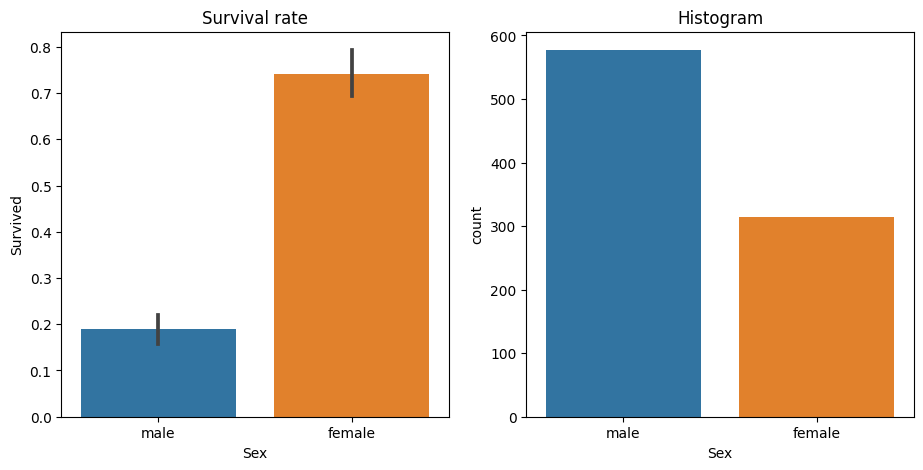

In [27]:
fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.barplot(data=train_df, y='Survived', x="Sex", ax=axs[0]).set(title="Survival rate")
sns.countplot(data=train_df, x="Sex", ax=axs[1]).set(title="Histogram");

In [23]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [24]:
train_df[['Age','Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0
